# Estadística con Python

### GitHub repository: https://github.com/jorgemauricio/python_statistics

### Instructor: Jorge Mauricio

## Media, Mediana

Del archivo `db_alumnos.csv` que se encuentra en la carpeta `data` y que tiene la siguiente estructura:

        Asiento        : El asiento asignado al alumno    : 1 al 40
        Grupo          : Grupo al que pertenece el alumno : A a la F
        Sexo           : Sexo del alumno                  : M o F
        Tarea1-6       : Tarea de 1 a 6                   : 0 a 10
        Asistencia     : Asistencia en clase              : 0 a 10
        Conducta       : Conducta                         : 0 a 10
        Participacion  : Participacion                    : 0 a 10
        Proyecto1      : Proyecto1                        : 0 a 10
        Proyecto2      : Proyecto2                        : 0 a 10
        Examen         : Examen                           : 0 a 10
        Asistencia     : Asistencia                       : 0 a 10
        Autoevaluacion : Autoevaluacion del alumno        : 0 a 10
        

* Obtener los 5 grupos con mayor valor en media en el rubro de Exámen
* Obtener los 5 grupos con menor valor en media en el rubro de Exámen
* Cual es la distribucion de la calificacion del rubro de Examen
* Cual es el sexo con mayor calificación en la Tarea 3
* Cuantos hombres y mujeres tienen una calificación mayor a 8 en el Proyecto 1
* Podrías identificar a los alumnos problema del grupo A
* Cuales son las variables con la mayor correlación entre si
* Cuales son las dos variables con el valor más alto de R2 y muestra la gráfica de su regresión lineal
* Cual es la correlación que tienen las variables con el rubro de Examen



In [667]:
# librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
plt.style.use("seaborn")
%matplotlib inline

In [668]:
# leer csv
df = pd.read_csv("data/db_alumnos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 17 columns):
Unnamed: 0        13000 non-null int64
Asiento           13000 non-null int64
Grupo             13000 non-null object
Sexo              13000 non-null object
Tarea1            13000 non-null int64
Tarea2            13000 non-null int64
Tarea3            13000 non-null int64
Tarea4            13000 non-null int64
Tarea5            13000 non-null float64
Tarea6            13000 non-null float64
Asistencia        13000 non-null int64
Conducta          13000 non-null float64
Participacion     13000 non-null float64
Proyecto1         13000 non-null float64
Proyecto2         13000 non-null float64
Examen            13000 non-null float64
Autoevaluacion    13000 non-null float64
dtypes: float64(8), int64(7), object(2)
memory usage: 1.7+ MB


## Obtener los 5 grupos con mayor valor en media en el rubro de Exámen

In [669]:
# media de los grupos
df.groupby("Grupo").mean()[["Examen"]].sort_values(by="Examen", ascending=False).head()

Examen
Grupo          
P      6.547441
K      6.467154
Y      6.464202
U      6.463002
C      6.452954

## Obtener los 5 grupos con menor valor en media en el rubro de Exámen

In [670]:
# media de los grupos
df.groupby("Grupo").mean()[["Examen"]].sort_values(by="Examen", ascending=False).tail()

Examen
Grupo          
Q      6.348071
D      6.340989
I      6.340057
Z      6.307994
G      6.296834

# Cual es la distribucion de la calificacion del rubro de examen

Text(0.5,1,'Distribucion de la calificacion en el Examen')

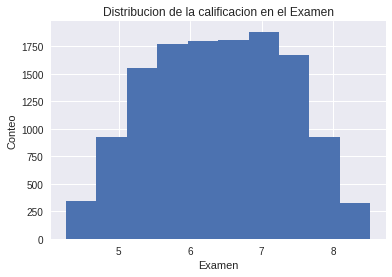

In [671]:
# Histogram of grades
plt.hist(df['Examen'], bins = 10)
plt.xlabel('Examen')
plt.ylabel('Conteo')
plt.title('Distribucion de la calificacion en el Examen')

# Graficar la distribucion de la calificacion del rubro de examen por sexo

Text(0.5,1,'Grafica de densidad en el Exámen por Sexo')

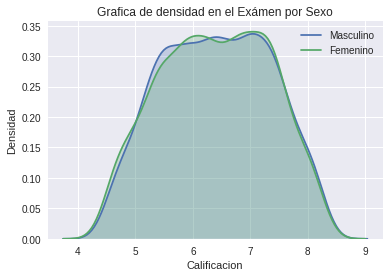

In [672]:
sns.kdeplot(df[df['Sexo'] == 'M']['Examen'], 
            label = 'Masculino', shade = True)
sns.kdeplot(df[df['Sexo'] == 'F']['Examen'], 
            label = 'Femenino', shade = True)
# Add labeling
plt.xlabel('Calificacion')
plt.ylabel('Densidad')
plt.title('Grafica de densidad en el Exámen por Sexo')

##  Cual es el sexo con la media mayor en la Tarea 3

In [673]:
df.groupby("Sexo").mean()["Tarea3"]

Sexo
F    7.494719
M    7.520878
Name: Tarea3, dtype: float64

## Cuantos hombres y mujeres tienen una calificación mayor a 8 en el Proyecto 1

In [674]:
df[df['Proyecto1']>=8]["Sexo"].value_counts()

M    430
F    386
Name: Sexo, dtype: int64

In [675]:
df[df['Proyecto1']>8]["Sexo"].value_counts(normalize=True)

M    0.52139
F    0.47861
Name: Sexo, dtype: float64

## Podrías identificar a los alumnos problema del grupo A

In [676]:
table = df[df["Grupo"]=="A"].pivot_table("Conducta", index="Asiento", columns="Sexo")
table

Sexo       F    M
Asiento          
0        6.4  NaN
1        6.0  NaN
2        NaN  4.4
3        4.4  NaN
4        5.2  NaN
5        5.2  NaN
6        NaN  5.2
7        5.4  NaN
8        NaN  4.4
9        5.8  NaN
10       NaN  5.8
11       NaN  4.2
12       NaN  5.6
13       5.0  NaN
14       6.2  NaN
15       5.2  NaN
16       NaN  3.8
17       NaN  6.2
18       5.8  NaN
19       4.2  NaN
20       5.8  NaN
21       5.4  NaN
22       5.0  NaN
23       6.4  NaN
24       NaN  6.0
25       4.8  NaN
26       4.0  NaN
27       7.2  NaN
28       NaN  6.4
29       6.2  NaN
...      ...  ...
470      NaN  4.0
471      NaN  5.6
472      5.0  NaN
473      NaN  4.0
474      5.6  NaN
475      NaN  5.2
476      4.4  NaN
477      5.4  NaN
478      6.0  NaN
479      NaN  4.8
480      NaN  7.0
481      NaN  5.2
482      5.8  NaN
483      NaN  5.2
484      6.6  NaN
485      NaN  3.4
486      6.4  NaN
487      6.6  NaN
488      4.4  NaN
489      NaN  6.4
490      NaN  4.2
491      5.4  NaN
492      4.2  NaN
493      4.8  NaN
494      4.6  NaN
495      NaN  5.8
496      6.8  NaN
497      NaN  5.6
498      NaN  6.2
499      NaN  5.0

[500 rows x 2 columns]

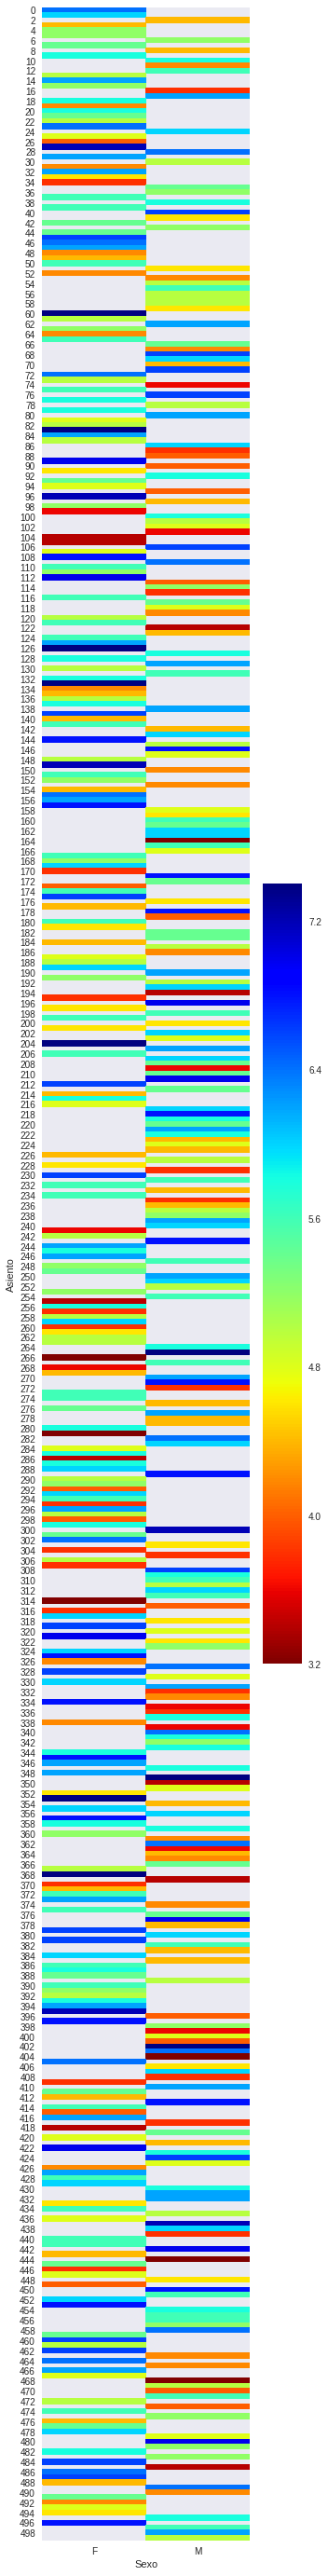

In [677]:
fig = plt.figure(figsize=(5,50))
sns.heatmap(table, cmap="jet_r")

In [678]:
df[df["Grupo"] == "A"]["Conducta"].sort_values(ascending=False).tail()

164    3.2
314    3.2
444    3.2
281    3.2
266    3.2
Name: Conducta, dtype: float64

## Cuales son las variables con la mayor correlación entre sí

In [679]:
df.corr()

Unnamed: 0   Asiento    Tarea1    Tarea2    Tarea3    Tarea4  \
Unnamed: 0        1.000000  1.000000 -0.023844 -0.025702  0.012477 -0.008154   
Asiento           1.000000  1.000000 -0.023844 -0.025702  0.012477 -0.008154   
Tarea1           -0.023844 -0.023844  1.000000  0.011288 -0.011199  0.002260   
Tarea2           -0.025702 -0.025702  0.011288  1.000000 -0.000664  0.001820   
Tarea3            0.012477  0.012477 -0.011199 -0.000664  1.000000 -0.000733   
Tarea4           -0.008154 -0.008154  0.002260  0.001820 -0.000733  1.000000   
Tarea5            0.010351  0.010351 -0.017133  0.004402  0.830639  0.002308   
Tarea6           -0.021854 -0.021854  0.604990  0.299284 -0.007105 -0.003411   
Asistencia       -0.007409 -0.007409 -0.013037 -0.003120 -0.008435 -0.000905   
Conducta         -0.019673 -0.019673  0.555928  0.003804 -0.013359  0.000528   
Participacion    -0.011860 -0.011860  0.178843 -0.000906 -0.010446 -0.000458   
Proyecto1        -0.014324 -0.014324  0.625921  0.006174  0.436864  0.001254   
Proyecto2        -0.019299 -0.019299  0.269549  0.205238 -0.011208  0.055484   
Examen           -0.015960 -0.015960  0.370167  0.059434  0.116094  0.015823   
Autoevaluacion   -0.016709 -0.016709  0.404882  0.039373  0.070530  0.010332   

                  Tarea5    Tarea6  Asistencia  Conducta  Participacion  \
Unnamed: 0      0.010351 -0.021854   -0.007409 -0.019673      -0.011860   
Asiento         0.010351 -0.021854   -0.007409 -0.019673      -0.011860   
Tarea1         -0.017133  0.604990   -0.013037  0.555928       0.178843   
Tarea2          0.004402  0.299284   -0.003120  0.003804      -0.000906   
Tarea3          0.830639 -0.007105   -0.008435 -0.013359      -0.010446   
Tarea4          0.002308 -0.003411   -0.000905  0.000528      -0.000458   
Tarea5          1.000000 -0.075586   -0.005396 -0.014197      -0.008594   
Tarea6         -0.075586  1.000000   -0.016927  0.328816       0.099303   
Asistencia     -0.005396 -0.016927    1.000000  0.823912       0.981462   
Conducta       -0.014197  0.328816    0.823912  1.000000       0.917253   
Participacion  -0.008594  0.099303    0.981462  0.917253       1.000000   
Proyecto1       0.433456  0.357236    0.615037  0.866032       0.725144   
Proyecto2      -0.019568  0.303076    0.928016  0.924231       0.964796   
Examen          0.113493  0.252937    0.912025  0.967965       0.968347   
Autoevaluacion  0.068802  0.260844    0.903915  0.980899       0.967022   

                Proyecto1  Proyecto2    Examen  Autoevaluacion  
Unnamed: 0      -0.014324  -0.019299 -0.015960       -0.016709  
Asiento         -0.014324  -0.019299 -0.015960       -0.016709  
Tarea1           0.625921   0.269549  0.370167        0.404882  
Tarea2           0.006174   0.205238  0.059434        0.039373  
Tarea3           0.436864  -0.011208  0.116094        0.070530  
Tarea4           0.001254   0.055484  0.015823        0.010332  
Tarea5           0.433456  -0.019568  0.113493        0.068802  
Tarea6           0.357236   0.303076  0.252937        0.260844  
Asistencia       0.615037   0.928016  0.912025        0.903915  
Conducta         0.866032   0.924231  0.967965        0.980899  
Participacion    0.725144   0.964796  0.968347        0.967022  
Proyecto1        1.000000   0.746956  0.865203        0.860253  
Proyecto2        0.746956   1.000000  0.970054        0.966607  
Examen           0.865203   0.970054  1.000000        0.997983  
Autoevaluacion   0.860253   0.966607  0.997983        1.000000

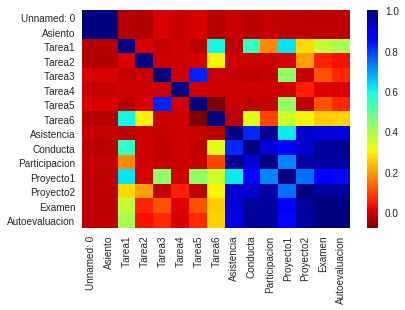

In [680]:
sns.heatmap(df.corr(), cmap="jet_r")

In [681]:
cols = df.columns
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)

arr_var1 = []
arr_var2 = []
arr_r2= []


for columna1 in df[numeric_variables].columns[1:]:
    for columna2 in df[numeric_variables].columns[1:]:
        if columna1 != columna2:
            X = np.array(df[columna1])
            y = np.array(df[columna2])
            slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
            #print("Valor de R2 para {} y {}: {}".format(columna1, columna2, r_value ** 2))
            arr_var1.append(columna1)
            arr_var2.append(columna2)
            arr_r2.append(r_value**2)
            
resul = pd.DataFrame()
resul["Var1"] = np.array(arr_var1)
resul["Var2"] = np.array(arr_var2)
resul["R2"] = np.array(arr_r2)
resul.sort_values(by="R2", ascending=False).head()

Var1            Var2        R2
181  Autoevaluacion          Examen  0.995969
168          Examen  Autoevaluacion  0.995969
124   Participacion      Asistencia  0.963269
99       Asistencia   Participacion  0.963269
116        Conducta  Autoevaluacion  0.962163

## Cuales son las dos variables con el valor más alto de R2 y muestra la gráfica de su regresión lineal

In [682]:
X = np.array(df["Examen"])
y = np.array(df["Autoevaluacion"])

In [683]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [684]:
r_value ** 2

0.9959694690586617

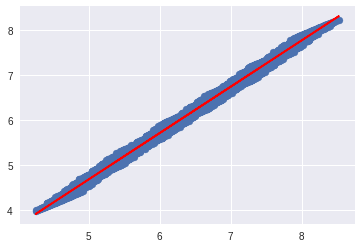

In [685]:
def predict(x):
    return slope * x + intercept

fitline = predict(X)

plt.scatter(X,y)
plt.plot(X, fitline, c='r')
plt.show()

In [686]:
X = np.array(df["Participacion"])
y = np.array(df["Asistencia"])

In [687]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [688]:
r_value ** 2

0.9632686239267616

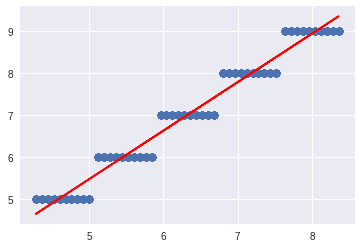

In [689]:
def predict(x):
    return slope * x + intercept

fitline = predict(X)

plt.scatter(X,y)
plt.plot(X, fitline, c='r')
plt.show()

## Cual es la correlación que tienen las variables con el rubro de Examen

In [690]:
df.corr()['Examen'].sort_values()

Unnamed: 0       -0.015960
Asiento          -0.015960
Tarea4            0.015823
Tarea2            0.059434
Tarea5            0.113493
Tarea3            0.116094
Tarea6            0.252937
Tarea1            0.370167
Proyecto1         0.865203
Asistencia        0.912025
Conducta          0.967965
Participacion     0.968347
Proyecto2         0.970054
Autoevaluacion    0.997983
Examen            1.000000
Name: Examen, dtype: float64

In [691]:
# df is features and labels are the targets 
# Split by putting 25% in the testing set
X = pd.read_csv("data/db_alumnos.csv")
y = X.pop("Examen")

In [692]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

Unnamed: 0  Asiento  Tarea1  Tarea2  Tarea3  Tarea4  Tarea5  Tarea6  \
0           0        0       4       7       6       9     5.4     5.3   
1           1        1       8       7       6       8     5.4     6.5   
2           2        2       6       9       6       9     5.4     6.5   
3           3        3       3       9       6       8     5.4     5.6   
4           4        4       4       6       6       9     5.4     5.0   

   Asistencia  Conducta  Participacion  Proyecto1  Proyecto2  Autoevaluacion  
0           9       6.4           7.96       6.68      7.702          7.1844  
1           7       6.0           6.60       6.68      6.770          6.4700  
2           5       4.4           4.76       5.48      5.782          5.0004  
3           6       4.4           5.36       5.28      6.012          5.1864  
4           7       5.2           6.28       5.88      6.396          5.8992

In [693]:
X_train, X_test, y_train, y_test = train_test_split(X[numeric_variables], y, test_size=0.3, random_state=1)

In [694]:
model = LinearRegression()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(6))

R^2: 1.0


In [695]:
data = pd.DataFrame({"Original": y, "Prediccion": model.predict(X[numeric_variables])})

/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


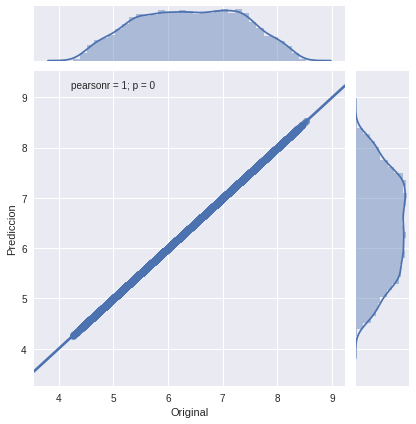

In [696]:
sns.jointplot("Original", "Prediccion", data=data, kind="reg")

In [697]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-1.08296396e-15 -9.97481669e-16  3.27386450e-02  1.49340621e-02
  3.45725507e-02  1.49340621e-02  3.45725507e-02  1.49340621e-02
  1.99921803e-01  1.26500811e-01  1.70553406e-01  1.00345470e-01
  1.23867603e-01  1.33958880e-01]


In [698]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.00
Variance score: 1.00


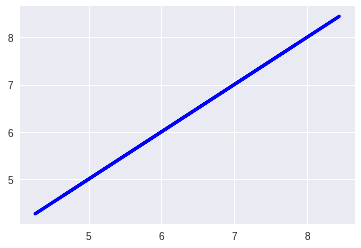

In [715]:

plt.plot(y_test, y_pred, color='blue', linewidth=3)

### OLS

In [699]:
result = sm.ols(formula='Prediccion ~ Original', data=data).fit()

In [700]:
print(result.params)

Intercept   -4.318768e-14
Original     1.000000e+00
dtype: float64


In [701]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Prediccion   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.296e+29
Date:                Tue, 06 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:56:05   Log-Likelihood:             3.5640e+05
No. Observations:               13000   AIC:                        -7.128e+05
Df Residuals:                   12998   BIC:                        -7.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.319e-14    1.8e-14     -2.402      0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1516513af390>,
      dtype=object)

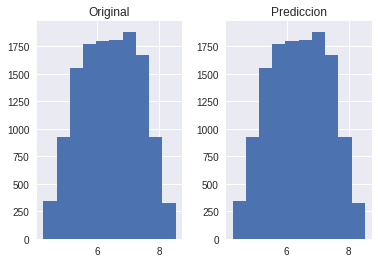

In [702]:
data.hist()